In [2]:
%matplotlib inline
import numpy as np
import pandas as pd


np.random.seed(29)

# Simulation

## Carnival Dice Rolls

### You are at a carnival and come across a person in a booth offering you a game of "chance" (as people in booths at carnivals tend to do).

### You pay 5 dollars and roll 3 dice. If the sum of the dice rolls is greater than 12, you get 15 dollars. If it's less than or equal to 12, you get nothing.

### Assuming the dice are fair, should you play this game? How would this change if the winning condition was a sum greater than or equal to 12?

In [3]:
n_trials = nrows = 10_000
# number os simulations
## the higher the better

n_dice = ncols = 3
# number of rolls per game

rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(nrows, ncols)
# np.random.choice will randomly pick a result from the specified list
# .reshape(x, y) will arrange the results in the specifed amount of trials and rolls

rolls

array([[6, 4, 5],
       [6, 3, 1],
       [1, 2, 2],
       ...,
       [6, 2, 1],
       [3, 4, 3],
       [4, 2, 4]])

In [4]:
sums_by_trial = rolls.sum(axis=1)
# sum(axis=1) will add all the rolls from each trial together

sums_by_trial

array([15, 10,  5, ...,  9, 10, 10])

In [5]:
wins = sums_by_trial > 12
# measures whether the sum exceeded the amount necessary to win

wins

array([ True, False, False, ..., False, False, False])

In [7]:
win_rate = wins.astype(int).mean()
# .astype(int) converts the bool values to 1 for true and 0 for false
# .mean() adds all the 1's and 0's and returns the average
## this is the pecentage of times in our simultion that we won the game

win_rate
# we had a 26% win rate

0.2633

In [8]:
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

# we calculate the average winnings by multiplying our win rate by our winnings and subtracting the cost of playing
## we can conclude that in this simulation we lost $1.05 on average each time we played

-1.0505000000000004

In [10]:
wins = sums_by_trial >= 12
win_rate = wins.astype(int).mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

# if we change the measurements of the game to be 12 or greater instead of just greater than 12 we could expect to win and average of 50 cents per game

0.5860000000000003

## No Rest or Relaxation

### There's a 30% chance my son takes a nap on any given weekend day. What is the chance that he takes a nap at least one day this weekend? What is the probability that he doesn't nap at all?

In [11]:
p_nap = .3
# percent probability the event occurs

ndays = ncols = 2
# number of chances per trial

n_simulated_weekends = nrows = 10**5
# number of trials

In [12]:
data = np.random.random((nrows, ncols))
# np.random.random(x, y) will provide random percents between 0 and 1 in the shape of the matrix designated

data

array([[0.46762045, 0.70078355],
       [0.18897809, 0.54312897],
       [0.253291  , 0.43836437],
       ...,
       [0.15008559, 0.37577491],
       [0.34690321, 0.58934311],
       [0.97135998, 0.57219933]])

In [13]:
naps = data < p_nap
# each time the percent exceeds the probability of the event occuring, we can assume the event occured

naps

array([[False, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [False, False],
       [False, False]])

In [15]:
naps.sum(axis=1)
# each 1 represents a weekend where the event occured

array([0, 1, 1, ..., 1, 0, 0])

In [16]:
(naps.sum(axis=1) >= 1).mean()
# percentage of times we observed the event

0.50998

In [17]:
(naps.sum(axis=1) == 0).mean()
# percentage of observations where no nap occured at all

0.49002

## One With Dataframes

### What is the probability of getting at least one 3 in 3 dice rolls?

In [18]:
n_simulations = nrows = 10**5
n_dice_rolled = ncols = 3

rolls = np.random.choice([1, 2, 3, 4, 5, 6], nrows * ncols).reshape(nrows, ncols)

(pd.DataFrame(rolls)
 .apply(lambda row: 3 in row.values, axis=1)
 .mean())

0.42324

# Probability Distributions

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

np.random.seed(123)

In [22]:
die_distribution = stats.randint(1, 7)
# randint(x, y) designates possible resultes being between the specified range

### Random Values

In [23]:
die_distribution.rvs()
# .rvs() will return a random variable from the range

6

In [24]:
die_distribution.rvs(5)
# .rvs(5) will return 5 random variables

array([3, 5, 3, 2, 4])

In [25]:
die_distribution.rvs((5, 5))
# .rvs(5, 5) will return a matrix of 5 by 5 random results

array([[3, 4, 2, 2, 1],
       [2, 2, 1, 1, 2],
       [4, 6, 5, 1, 1],
       [5, 2, 4, 3, 5],
       [3, 5, 1, 6, 1]])

Text(0.5, 1.0, 'Outcome of 10,000 Dice Rolls')

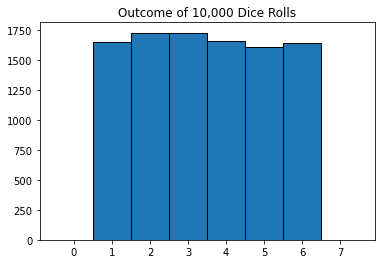

In [28]:
n = 10_000

x = die_distribution.rvs(n)

plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of {n:,} Dice Rolls')

# we can see in a fair dice roll the odds of each result are almost even

## PMF / PDF

In [29]:
die_distribution.pmf(3)
# .pmf(x) will provide the odds of rolling x

0.16666666666666666

## CDF / PPF

In [30]:
die_distribution.cdf(3)
# .cdf(x) will provide the odds of rolling less than x

0.5

In [31]:
die_distribution.ppf(5/6)
# .ppf(x) will take a probability and return the variable that is the cut off point of what is lower than that percentage

5.0

## SF / ISF

In [32]:
die_distribution.sf(4)
# .sf(x) will return the probability of rolling higher than x

0.33333333333333337

In [33]:
die_distribution.isf(1/3)
# .isf(x) will take a probability and return the cut off point of what is higher than that percentage

4.0

## Binomial Distribution

### You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get more than 10 of the questions right?

In [35]:
# binomial means there are only 2 possible outcomes, in this case either the guess is correct or the guess is not correct

stats.binom(30, .25).sf(10)
# stats.binom(x, y).sf(z) will calculate the odds out of x amount of trials, with y probability of getting the answer correct, how many times we got at leazt z amount of questions right

0.10572812269266013

### Suppose there is a 5% chance that a Codeup student will show up late to class. With a class of 20, what is the likelihood that everyone shows up on time?

In [36]:
stats.binom(20, .05).pmf(0)

0.3584859224085422

## Normal Distribution

### Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars. How much would the daily sales have to be to be in the top 10% of all days?

In [37]:
μ = 12000
# mean

σ = 2000
# standard deviation

sales = stats.norm(μ, σ)

top_10_percent_cutoff = sales.ppf(.9)

print('${:,.2f}'.format(top_10_percent_cutoff))

$14,563.10


### How likely is it that the store sells less than 10,000 dollars one day?

In [38]:
p = sales.cdf(10_000)

print(f'Ony any given day, there\'s a {p:.1%} chance we sell less than $10,000.')

Ony any given day, there's a 15.9% chance we sell less than $10,000.


## Poisson Distribution

### Codeup knows that, on average, students consume 5 lbs of coffee per week. How likely is it that the coffee consumption for this week is only 3 lbs?

In [39]:
stats.poisson(5).pmf(3)

0.1403738958142805